In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import pyarrow

In [2]:
df = pd.read_csv("text.csv")

In [3]:
df.head() #display first 5 rows of dataset

,Text,Emotion
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sadness
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sadness
4,i am a kindergarten teacher and i am thoroughl...,fear


In [4]:
df['Emotion'].value_counts() # couting the number of sentences of every kind of emotion.

Emotion
joy         141069
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: count, dtype: int64

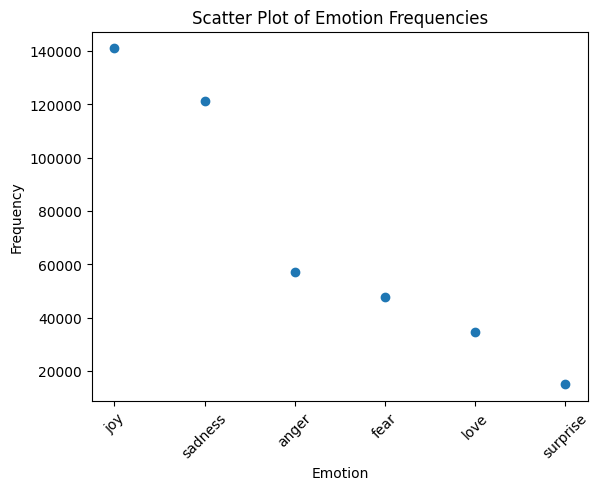

In [5]:
import matplotlib.pyplot as plt

# Assuming df['Emotion'].value_counts() gives the frequency of each emotion
emotion_counts = df['Emotion'].value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Frequency']

# Plotting the scatter plot
plt.scatter(emotion_counts['Emotion'], emotion_counts['Frequency'])
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Emotion Frequencies')
plt.xticks(rotation=45)
plt.show()



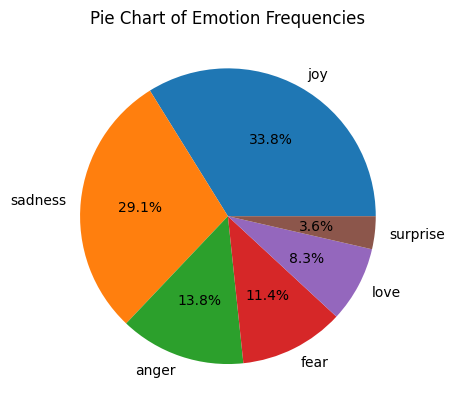

In [6]:
plt.pie(emotion_counts['Frequency'], labels=emotion_counts['Emotion'], autopct='%1.1f%%')
plt.title('Pie Chart of Emotion Frequencies')
plt.show()

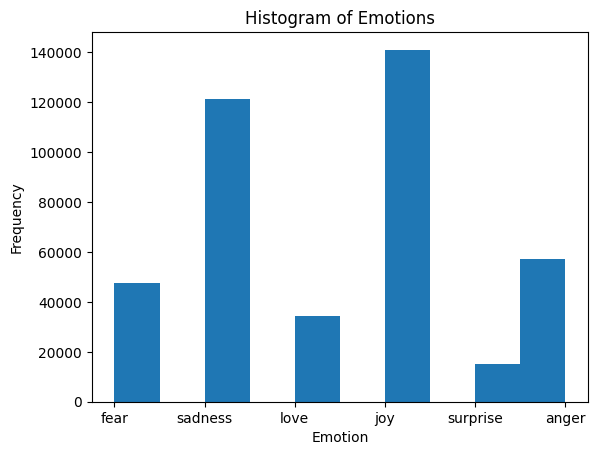

In [7]:
plt.hist(df['Emotion'])
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Histogram of Emotions')
plt.show()

In [8]:
print(df.columns)

Index(['Text', 'Emotion'], dtype='object')


In [9]:
import neattext.functions as nfx
# remove the user handles
if 'Text' in df.columns:
    # Apply the remove_userhandles function to the 'Text' column
    df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
else:
    print("The 'Text' column does not exist in your DataFrame. Please check the column name.")

In [10]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [11]:
# remove stopwords : frequently repeating words which have no significance in the prediction algorithm. Such articles are: a,and,the, if etc.
import nltk
import pandas as pd
import neattext.functions as nfx

# Download stopwords
nltk.download('stopwords')
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

# Read DataFrame from CSV file
# df = pd.read_csv('your_file.csv')  # Replace 'your_file.csv' with the path to your CSV file

# Define a function to preprocess text
def preprocess_text(text):
    # Remove user handles
    text = nfx.remove_userhandles(text)
    # Tokenize the text
    words = text.split()
    # Define negation words
    negation_words = ["not", "no", "never", "none", "neither", "nor", "nobody", "nowhere", "nothing"]
    # Initialize a flag to keep track of negation
    negation_flag = False
    # Process the words
    processed_words = []
    for word in words:
        if word in negation_words:
            negation_flag = True
        elif negation_flag:
            processed_words.append("not_" + word)  # Prefixing with "not_" to differentiate from non-negated words
            negation_flag = False
        else:
            processed_words.append(word)
    # Join the processed words back into text
    processed_text = ' '.join(processed_words)
    return processed_text

print(df['Clean_Text'])

df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_currencies)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_dates)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_emails)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_phone_numbers)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_hashtags)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                               feel helpless heavy hearted
1         ive enjoyed able slouch relax unwind frankly n...
2                   gave internship dmrg feeling distraught
3                                       dont know feel lost
4         kindergarten teacher thoroughly weary job take...
                                ...                        
416806    feel like telling horny devils find site suite...
416807    began realize feeling agitated restless though...
416808    feel curious previous early dawn time seek tro...
416809    feel becuase tyranical nature government el sa...
416810    think spent time investigating surroundings th...
Name: Clean_Text, Length: 416811, dtype: object


In [12]:
df

,Text,Emotion,Clean_Text
0,i just feel really helpless and heavy hearted,fear,feel helpless heavy hearted
1,ive enjoyed being able to slouch about relax a...,sadness,ive enjoyed able slouch relax unwind frankly n...
2,i gave up my internship with the dmrg and am f...,fear,gave internship dmrg feeling distraught
3,i dont know i feel so lost,sadness,dont know feel lost
4,i am a kindergarten teacher and i am thoroughl...,fear,kindergarten teacher thoroughly weary job take...
...,...,...,...
416806,i feel like telling these horny devils to find...,love,feel like telling horny devils find site suite...
416807,i began to realize that when i was feeling agi...,anger,began realize feeling agitated restless though...
416808,i feel very curious be why previous early dawn...,surprise,feel curious previous early dawn time seek tro...
416809,i feel that becuase of the tyranical nature of...,anger,feel becuase tyranical nature government el sa...


In [13]:
x = df['Clean_Text']
y = df['Emotion']

In [14]:
# split data set into training data and test data
from sklearn.model_selection import train_test_split

# here we are using 70 percent data for trainig and 30 precent data for testing. 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=80)

In [15]:
# liabraies used during trraining
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint
# algorithm used for training.
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [16]:
# time 38 min
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib

# Define pipelines for each algorithm
pipelines = {
    'Random Forest': Pipeline([('cv', CountVectorizer()), ('rf', RandomForestClassifier(n_estimators=10))]),
    'Logistic Regression': Pipeline([('cv', CountVectorizer()), ('lr', LogisticRegression())]),
    'Multinomial Naive Bayes': Pipeline([('cv', CountVectorizer()), ('nb', MultinomialNB())])
}

# Train and evaluate each pipeline
accuracies = {}
for name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)
    accuracy = pipeline.score(x_test, y_test)
    accuracies[name] = accuracy

# Plot a bar graph to visualize accuracies
plt.bar(accuracies.keys(), accuracies.values())

# Adding values on top of the bars
for algo, acc in accuracies.items():
    plt.text(algo, acc, str(round(acc, 2)), ha='center', va='bottom')

plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Algorithms')
plt.xticks(rotation=45)
plt.show()



In [ ]:
import joblib

# Choose the algorithm with the highest accuracy
best_algorithm = max(accuracies, key=accuracies.get)
best_pipeline = pipelines[best_algorithm]

# Save the pipeline of the selected algorithm
joblib.dump(best_pipeline, 'text_emotion_detection.pkl')

['best_algorithm_test2.pkl']